### Packages

In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from pathlib import Path
import umap.umap_ as umap
from scipy import stats
from functools import reduce


## Defininng paths

In [69]:
top_dir = os.path.dirname(os.getcwd())
outpath = os.path.join(top_dir, "Figures")
dirname = "Features_map"
outdirpath = os.path.join(outpath, dirname)

def makedirectory(outdirpath):
    if not os.path.exists(outdirpath):
        try:
            os.makedirs(outdirpath)
            print("Directory is created")
        except OSError as e:
            print("Directory already existed")
        
makedirectory(outdirpath)

## Loading data and wrangling

In [88]:
path = Path("../collated/")

fname = "C-7210-01-CMP-008-gray_collapsed_sampled.csv"


fpath = os.path.join(path, fname)


df = pd.read_csv(fpath)


metadata = [col for col in df.columns if "Metadata" in col]
var = [col for col in df.columns if not "Metadata" in col]
exclude_var = ['Cells_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_Costes_DNA_RNA']

variables = [v for v in var if v not in exclude_var]


df['Metadata_Target'].replace(np.nan, 'NA', inplace=True)
df['Metadata_Annotation'].replace('active ', 'active', inplace=True)

cellline = "A549"


#drug_samples = ['FMF-04-159-2', 'FMF-05-176-1'] # for CDK14pan-TAIRE pathway

drug_samples = ['AX15836','JWG-071', 'JWG-119','FMF-04-159-2', 'FMF-05-176-1'] ## for ERK5 pathway excluding 'AX15836' which is active drug but didn't work

d = df.query('Metadata_cell_line in @ cellline and Metadata_compound_name in @ drug_samples')
d.Metadata_Well.unique()

array(['F04', 'F08', 'F17', 'F21', 'G03', 'G04', 'G07', 'G08', 'G16',
       'G17', 'G20', 'G21', 'H03', 'H04', 'H07', 'H08', 'H16', 'H17',
       'H20', 'H21', 'I05', 'I06', 'I08', 'I09', 'I18', 'I19', 'I21',
       'I22', 'J05', 'J06', 'J08', 'J09', 'J18', 'J19', 'J21', 'J22',
       'K06', 'K09', 'K19', 'K22'], dtype=object)

In [81]:
# d = df.query('Metadata_cell_line in @ cellline and Metadata_compound_name in @ drug_samples')
# tmp = d.query('Metadata_compound_name == "JWG-071"')
# tmp

,Metadata_Plate,Metadata_Well,Metadata_broad_sample,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_cell_line,Metadata_well_position,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
123,BR00100032,F04,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,F04,NaN,10.0,DMSO,...,-1.446567,0.139868,-0.275977,-0.703852,-0.137257,0.587189,-0.376156,0.279596,-1.029650,0.513779
127,BR00100032,F08,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,F08,NaN,10.0,DMSO,...,-1.072760,0.359175,0.112412,-0.940571,0.712517,1.055103,-0.365047,1.681680,-0.186153,0.785042
136,BR00100032,F17,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,F17,NaN,10.0,DMSO,...,-1.149343,0.847113,0.033833,-0.600673,0.303416,1.327465,0.050108,2.211791,-0.242797,1.032168
140,BR00100032,F21,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,F21,NaN,10.0,DMSO,...,-1.489201,0.452273,0.158172,-0.327941,0.460639,0.984406,0.178876,0.247987,-1.377184,1.047019
245,BR00100032,K06,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,K06,NaN,10.0,DMSO,...,-1.240818,0.322009,-0.699093,-1.146286,-0.344098,0.698098,-0.838429,-0.401571,-0.947696,0.321018
248,BR00100032,K09,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,K09,NaN,10.0,DMSO,...,-0.778308,0.602234,0.495979,-0.348889,1.034351,1.585645,0.011129,0.477750,-0.475670,1.145238
258,BR00100032,K19,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,K19,NaN,10.0,DMSO,...,-1.075288,0.169847,-0.251918,-0.506028,-0.005800,0.666588,-0.206413,1.505342,-0.448807,0.595824
261,BR00100032,K22,BRD-U14034701-000-01-8,BR00100032,C-7210-01-CMP-008-gray,A549,K22,NaN,10.0,DMSO,...,-1.333183,-0.111404,-0.057283,-0.506622,0.259014,0.291905,-0.017188,0.154599,-0.632008,-0.266588


## Assigning Features groups, channels and calculating mean z-scores

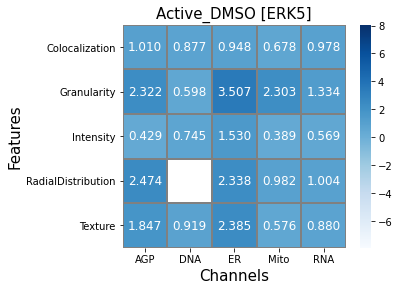

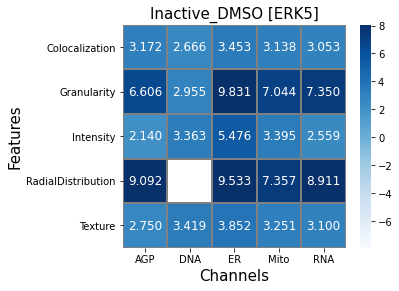

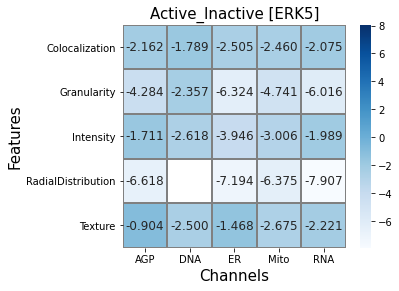

In [83]:

def feature_grid(df, cellline, drug_samples,comparison):
    
    
     ## Selecting dataframe for specific cellline and samples
        
    d = df.query('Metadata_cell_line in @ cellline and Metadata_compound_name in @ drug_samples')


    feat = [col for col in d.columns if not "Metadata" in col]

    featlist =  ['Metadata_compound_name'] + feat



    dn = (d.loc[:, featlist].groupby('Metadata_compound_name')
      .mean()
      .T
      .reset_index()
      .rename(columns={'index': "variables"})
     )


    dn['Compartment'] = np.where(dn.variables.str.contains("Cells"), 'Cells',
                np.where(dn.variables.str.contains("Nuclei"), 'Nuclei', 
                np.where(dn.variables.str.contains("Cytoplasm"), 'Cytoplasm', 'NA')))


    dn['Features'] = np.where(dn.variables.str.contains("RadialDistribution"), 'RadialDistribution', 
                np.where(dn.variables.str.contains("Texture"), 'Texture', 
                np.where(dn.variables.str.contains("Intensity"), 'Intensity',
                np.where(dn.variables.str.contains("AreaShape"), 'AreaShape',
                np.where(dn.variables.str.contains("Correlation"), 'Correlation',
                np.where(dn.variables.str.contains("Neighbors"), 'Neighbors',
                np.where(dn.variables.str.contains("Granularity"), 'Granularity', 'NA')))))))
    
    # Taking mean absolute  z scores
    

# Incase of CDK14
#     dn = dn.assign(Covalent_DMSO = lambda x: abs(x[drug_samples[1]]) - abs(x['DMSO']),
#                   Reversible_DMSO = lambda x: abs(x[drug_samples[2]]) - abs(x['DMSO']),
#                   Covalent_Reversible = lambda x: abs(x[drug_samples[1]]) - abs(x[drug_samples[2]]))

    dn = dn.assign(Active_DMSO = lambda x: abs(x[drug_samples[1]]) - abs(x['DMSO']),
                  Inactive_DMSO = lambda x: abs(x[drug_samples[2]]) - abs(x['DMSO']),
                  Active_Inactive = lambda x: abs(x[drug_samples[1]]) - abs(x[drug_samples[2]]))


    
    
    channels = ['DNA', 'AGP', 'Mito', 'ER', 'RNA']

    feat_groups = ['RadialDistribution', 'Texture', 'Intensity', 'Correlation', 'Granularity']
    
    area_neigh = ['AreaShape','Neighbors']
    
      

    data = []

    for gp in feat_groups:
   
        tmp = dn.query("Features in @ gp")


        for ch in channels:
        
         
            if isinstance(comparison, str):
                
                comparison = [comparison]
                
            
            for comp in comparison:
            
            
                tmp1 = (tmp[tmp.variables.str.contains(ch)]
                   .groupby(['Features'])[comp]
                   .mean()
                   )
        
                if not tmp1.empty:
              
                    Channel = str(ch)
                    Feature = str(gp)
                
                    tmp2 = pd.DataFrame([Feature, Channel]).T            
                    tmp2.columns = ['Features', 'Channels']
                    tmp2[comp] = tmp1[0]
                    data.append(tmp2)

    data = pd.concat(data)
    
   


    return data

## Assing column names has to be fixed for different comparisons

## Creating dataframes for three comparison and merging them  
#complist = ['Covalent_DMSO', 'Reversible_DMSO', 'Covalent_Reversible']
complist = ['Active_DMSO', 'Inactive_DMSO', 'Active_Inactive']

dt_1 = feature_grid(df, cellline, drug_samples, complist[0]) 
dt_2 = feature_grid(df, cellline, drug_samples, complist[1]) 
dt_3 = feature_grid(df, cellline, drug_samples, complist[2]) 



# ## Renaming "Correlation" to "Colocalization"

prf = (reduce(lambda x,y: pd.merge(x,y, on=['Features', 'Channels'], how='left'), [dt_1, dt_2, dt_3])
       .replace('Correlation', 'Colocalization', regex=True)
       
      )


# ### calculating the min and 95th percentile value for the color scale bar in plotting for comparison

min_value = prf[[complist[0],complist[1], complist[2]]].min().min()

max_value = np.quantile(prf[[complist[0],complist[1], complist[2]]], .95)

complist = ['Active_DMSO', 'Inactive_DMSO', 'Active_Inactive']

for cmp in complist:

    dt = prf.pivot('Features', 'Channels')[cmp]
       
    plt.figure(figsize=(5,5))
    
    plt.xlabel('Channels', size=15)
    plt.ylabel('Features', size=15)
    plt.title(str(cmp) + ' [ERK5]', size=15)
    ax = sns.heatmap(dt, annot=True, fmt=".3f",annot_kws={"size": 12}, linewidths=1, vmin=min_value, vmax=max_value, linecolor="gray", square=True, cbar_kws={"shrink": .82}, cmap="Blues", cbar=True)
    
    fig = ax.get_figure()

    #fig.savefig(outdirpath + '/' + str(cmp) + '_allcompartments_blues.png', bbox_inches="tight")
    


## Neighobors feature

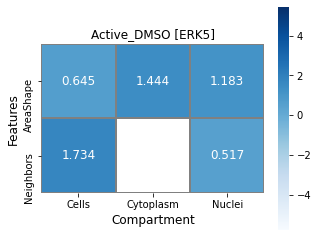

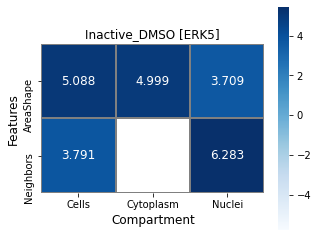

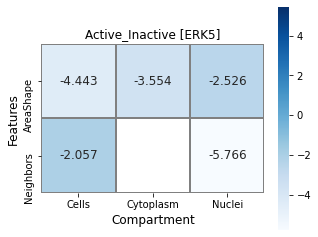

In [59]:

d = df.query('Metadata_cell_line in @ cellline and Metadata_compound_name in @ drug_samples')


feat = [col for col in d.columns if not "Metadata" in col]

featlist =  ['Metadata_compound_name'] + feat



dn = (d.loc[:, featlist].groupby('Metadata_compound_name')
    .mean()
    .T
    .reset_index()
    .rename(columns={'index': "variables"})
    )


dn['Compartment'] = np.where(dn.variables.str.contains("Cells"), 'Cells',
             np.where(dn.variables.str.contains("Nuclei"), 'Nuclei', 
            np.where(dn.variables.str.contains("Cytoplasm"), 'Cytoplasm', 'NA')))

dn['Features'] = np.where(dn.variables.str.contains("AreaShape"), 'AreaShape',
                np.where(dn.variables.str.contains("Neighbors"), 'Neighbors', 'NA'))


dn = dn.query("Features != 'NA'")
    
#Taking mean absolute  z scores

# dn = dn.assign(Covalent_DMSO = lambda x: abs(x[drug_samples[1]]) - abs(x['DMSO']),
#                   Reversible_DMSO = lambda x: abs(x[drug_samples[2]]) - abs(x['DMSO']),
#                   Covalent_Reversible = lambda x: abs(x[drug_samples[1]]) - abs(x[drug_samples[2]]))

dn = dn.assign(Active_DMSO = lambda x: abs(x[drug_samples[1]]) - abs(x['DMSO']),
                  Inactive_DMSO = lambda x: abs(x[drug_samples[2]]) - abs(x['DMSO']),
                  Active_Inactive = lambda x: abs(x[drug_samples[1]]) - abs(x[drug_samples[2]]))



selected_column = ['Active_DMSO', 'Inactive_DMSO', 'Active_Inactive']

data = []
for sc in selected_column:
    
    tmp2 = (dn.groupby(['Features', 'Compartment'])[sc]
    .mean()
    .reset_index()
           )
    
    data.append(tmp2)
            
            
            
prf = pd.concat(data, axis=1)
      


prf = prf.loc[:, ~prf.columns.duplicated()] 
                      

### calculating the min and 95th percentile value for the color scale bar in plotting for comparison


min_value = prf[[complist[0],complist[1], complist[2]]].min().min()

max_value = np.quantile(prf[[complist[0],complist[1], complist[2]]], .95)


for sec in selected_column:
    
    tmp3 = prf.pivot('Features', 'Compartment')[sec]

    ### Plotting
      
    plt.figure(figsize=(5,5))
    plt.xlabel('Compartment', size=12)
    plt.ylabel('Features', size=12)
    plt.title(str(sec) + ' [ERK5]', size=12)
    ax = sns.heatmap(tmp3, annot=True, fmt=".3f",annot_kws={"size": 12}, vmin = min_value, vmax = max_value,linewidths=1, linecolor="gray", square=True, cbar_kws={"shrink": .82}, cmap="Blues", cbar=True)
    
    fig = ax.get_figure()

    fig.savefig(str(outdirpath) + '/' + str(sec) + '_areashape_neighbors_Blues.png', bbox_inches="tight")
     

